# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [1226]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [1227]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [1228]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [1229]:
df_train.shape

(15223, 52)

In [1230]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [1231]:
df_test.shape

(14910, 52)

In [1232]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [1233]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [1234]:
df = df_test.append(df_train).reset_index(drop=True)

In [1235]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [1236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [1237]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Неполное среднее', 'Ученая степень', 'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова', 'Не состоял в браке', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Сборочные производства', 'Энергетика', 'Юридические услуги/нотариальные услуги', 'Банк/Финансы', 'Транспорт', 'Недвижимость', 'Сельское хозяйство', 'Страхование', 'ЧОП/Детективная д-ть', 'Торговля', 'Коммунальное хоз-во/Дорожные службы', 'Образование', 'Здравоохранение', 'Управляющая компания', 'Туризм', 'Наука', 'Информационные услуги', 'Салоны красоты и здоровья', 'СМИ/Реклама/PR-агенства', 'Логистика', 'Металлургия/Промышленность/Машиностроение', 'Химия/Парфюмерия/Фармацевтика', 'Информационные технологии', 'Нефтегазовая промышленность', 'Маркетинг', 'Ресторанный бизнес/Общественное питание', 'Государственная служба', 'Строительство', 'Подбор персонала', 'Развлечения/Искусство', 'Другие сферы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [1238]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [1239]:
# Пропуски для данных можно попробовать восстановить по косвенным признакам. Допустим WORK_TIME - можно принять, что
# если имеется GEN_TITLE и|или ORG_TP_STATE, JOB_DIR и т.п, то можно предположить, что WORK_TIME будет равен FACT_LIVING_TERM
# Если по косвенным определить трудно, то можно сгруппировать наверное признаки, создав группы, которые закодируют кортеж фич,
# и на место столбцов подставить код. Либо пытаться определить среднее, полагая, что разброс вряд ли будет больше одной сигмы.
# А некоторые поля - допустим регионы - можно опустить, судя по условию задачи это не слишком значимые признаки.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [1240]:
# Ввести кодирование - либо по средним значениям группы, 
# либо по количеству входящих объектов, либо пользоваться LabelEncoder, OneHotEncoder

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [1312]:
def collect_emptyvalue_features(_df):
    return _df.columns[_df.isnull().any()].values

def preproc_data(df_input):
    df_output = df_input.copy()
    # Удаляло идентификатор AGREEMENT_RK
    df_output.drop(['AGREEMENT_RK'], axis=1, inplace=True)
    
    # Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, 
    # LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    convertable_featrues = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for cf in convertable_features:
        df_output[cf] = df_output[cf].map(lambda v: v.replace(',', '.')).astype('float')
    
    # Что-то делала с пропусками
    # 1st variant
    # дропаем те фичи,которые имеют пропуски, потому что для них трудно определить заполнитель
    # вероятно это сразу приводит к уменьшению точности модели
    df_output.drop(['TP_PROVINCE', 
                    'REGION_NM', 
                    'REG_ADDRESS_PROVINCE',
                    'POSTAL_ADDRESS_PROVINCE',
                    'FACT_ADDRESS_PROVINCE',
                    'JOB_DIR'], axis=1, inplace=True)
    #
    # 2nd variant
    # Попробуем указать данным полям статус - не указан
    # for c in ['TP_PROVINCE', 'REGION_NM', 'ORG_TP_STATE', 'JOB_DIR']:
    #    df_output[c].fillna('Не указано', inplace=True)
    df_output['ORG_TP_STATE'].fillna('Не указано', inplace=True)
    df_output['GEN_TITLE'].fillna('Другое', inplace=True)
    df_output['GEN_INDUSTRY'].fillna('Другие сферы', inplace=True)
    df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace=True)
    df_output['ORG_TP_FCAPITAL'].fillna('Без участия', inplace=True)
    df_output.loc[(df_output['SOCSTATUS_PENS_FL'] == 1) 
                  & (df_output['SOCSTATUS_WORK_FL'] == 0)
                  & df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = 0
    df_output['WORK_TIME'].fillna(df_output[~df_output['WORK_TIME'].isnull()]['WORK_TIME'].median(), inplace=True)

    
    # Если я что-то упустил, кинем исключение, чтобы взглянуть на данные и определить заполнитель
    evf = collect_emptyvalue_features(df_output)
    if evf.size > 0:
        print(evf)
        # raise TypeError('There are some features with empty values')
    
    # Кодировала категориальные признаки
    #
    # 1st variant
#     df_output = pd.get_dummies(df_output, columns=['ORG_TP_FCAPITAL', 'EDUCATION', 'MARITAL_STATUS',
#                                                   'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE',
#                                                   'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE',
#                                                   'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE',
#                                                   'TP_PROVINCE', 'REGION_NM'])
    
    df_output = pd.get_dummies(df_output, columns=['EDUCATION',
                                                  'MARITAL_STATUS',
                                                  'GEN_INDUSTRY',
                                                  'GEN_TITLE',
                                                  'FAMILY_INCOME',
                                                  'ORG_TP_FCAPITAL',
                                                  'ORG_TP_STATE'])
    #
    # 2nd variant
#     df_output['ORG_TP_FCAPITAL'] = np.where(df_output['ORG_TP_FCAPITAL'].str.contains('Без участия'), 1, 0)
    
#     from sklearn.preprocessing import LabelEncoder
#     le_edu = LabelEncoder()
#     le_ms = LabelEncoder()
#     le_gi = LabelEncoder()
#     le_gt = LabelEncoder()
#     le_ots = LabelEncoder() 
#     # le_jd = LabelEncoder() 
#     le_fi = LabelEncoder()
#     # le_rap = LabelEncoder() 
#     # le_fap = LabelEncoder()
#     # le_pap = LabelEncoder()
#     # le_tp = LabelEncoder()
#     # le_rn = LabelEncoder()
#     df_output['EDUCATION'] = le_edu.fit_transform(df_output['EDUCATION'])
#     df_output['MARITAL_STATUS'] = le_ms.fit_transform(df_output['MARITAL_STATUS'])
#     df_output['GEN_INDUSTRY'] = le_gi.fit_transform(df_output['GEN_INDUSTRY'])
#     df_output['GEN_TITLE'] = le_gt.fit_transform(df_output['GEN_TITLE'])
#     df_output['ORG_TP_STATE'] = le_ots.fit_transform(df_output['ORG_TP_STATE'])
#     # df_output['JOB_DIR'] = le_jd.fit_transform(df_output['JOB_DIR'])
#     df_output['FAMILY_INCOME'] = le_fi.fit_transform(df_output['FAMILY_INCOME'])
#     # df_output['REG_ADDRESS_PROVINCE'] = le_rap.fit_transform(df_output['REG_ADDRESS_PROVINCE'])
#     # df_output['FACT_ADDRESS_PROVINCE'] = le_fap.fit_transform(df_output['FACT_ADDRESS_PROVINCE'])
#     # df_output['POSTAL_ADDRESS_PROVINCE'] = le_pap.fit_transform(df_output['POSTAL_ADDRESS_PROVINCE'])
#     # df_output['TP_PROVINCE'] = le_tp.fit_transform(df_output['TP_PROVINCE'])
#     # df_output['REGION_NM'] = le_rn.fit_transform(df_output['REGION_NM'])
    
    return df_output

df_output = preproc_data(df)
df_output.select_dtypes(include='object') # here must be only `sample`

,sample
0,test
1,test
2,test
3,test
4,test
5,test
6,test
7,test
8,test
9,test


In [1313]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [1315]:
y = df_train_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)

y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop(['TARGET'], axis=1)

In [1316]:
X.shape, y.shape

((15223, 105), (15223,))

#### Задание 5. Обучение и оценка качества разных моделей

In [1317]:
from sklearn.cross_validation import train_test_split
# train_test_split?

In [1318]:
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_train_test, y_train, y_train_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_train_test.shape, y_train_test.shape

((10656, 105), (10656,), (4567, 105), (4567,))

In [1322]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_train_test)
predict_proba_dtc = dtc.predict_proba(X_train_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_train_test)
predict_proba_rfc = rfc.predict_proba(X_train_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_train_test)
predict_proba_lr = lr.predict_proba(X_train_test)

In [1323]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

models_accuracy = {
    'dtc' : accuracy_score(y_train_test, predict_dtc),
    'rfc' : accuracy_score(y_train_test, predict_rfc),
    'lr'  : accuracy_score(y_train_test, predict_lr)
}

best_accuracy_score = max(models_accuracy.values())
models_accuracy, best_accuracy_score, list(filter(lambda k: models_accuracy.get(k) == best_accuracy_score, models_accuracy.keys()))

models_precision_score  = {
    'dtc' : precision_score(y_train_test, predict_dtc),
    'rfc' : precision_score(y_train_test, predict_rfc),
    'lr' : precision_score(y_train_test, predict_lr)
}

best_precision_score = max(models_precision_score.values())
models_precision_score, best_precision_score, list(filter(lambda k: models_precision_score.get(k) == best_precision_score, models_precision_score.keys()))


models_recall_score = {
    'dtc' : recall_score(y_train_test, predict_dtc),
    'rfc' : recall_score(y_train_test, predict_rfc),
    'lr' : recall_score(y_train_test, predict_lr)
}
    
best_recall_score = max(models_recall_score.values())
models_recall_score, best_recall_score, list(filter(lambda k: models_recall_score.get(k) == best_recall_score, models_recall_score.keys()))


models_accuracy, models_precision_score, models_recall_score

({'dtc': 0.7961462666958616,
  'rfc': 0.8767243266914824,
  'lr': 0.877819137289249},
 {'dtc': 0.17017543859649123,
  'rfc': 0.3181818181818182,
  'lr': 0.2857142857142857},
 {'dtc': 0.17477477477477477,
  'rfc': 0.012612612612612612,
  'lr': 0.0036036036036036037})

(-0.01, 1.01)

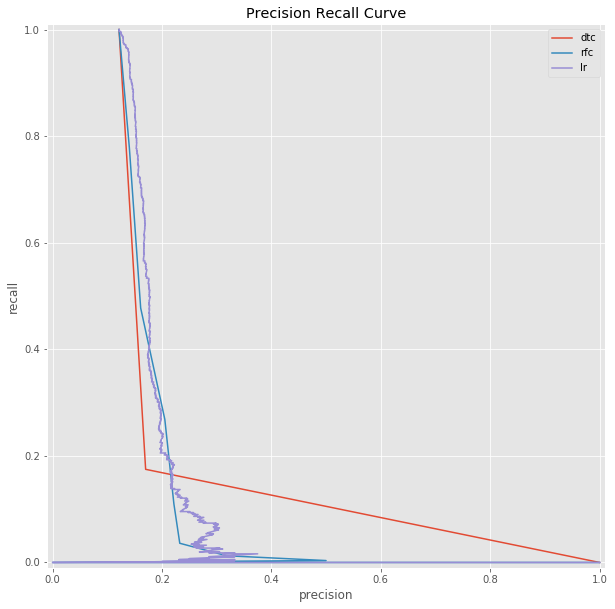

In [1328]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

precision_prc_dtc, recall_prc_dtc, treshold_prc_dtc = precision_recall_curve(y_train_test, predict_proba_dtc[:,1])
precision_prc_rfc, recall_prc_rfc, treshold_prc_rfc = precision_recall_curve(y_train_test, predict_proba_rfc[:,1])
precision_prc_lr, recall_prc_lr, treshold_prc_lr = precision_recall_curve(y_train_test, predict_proba_lr[:,1])

%matplotlib inline
plt.figure(figsize=(10, 10))
plt.plot(precision_prc_dtc, recall_prc_dtc, label='dtc')
plt.plot(precision_prc_rfc, recall_prc_rfc, label='rfc')
plt.plot(precision_prc_lr, recall_prc_lr, label='lr')
plt.legend(loc='upper right')
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('Precision Recall Curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(0.5284392318539876, 0.5957550771110093, 0.6378364905284146)

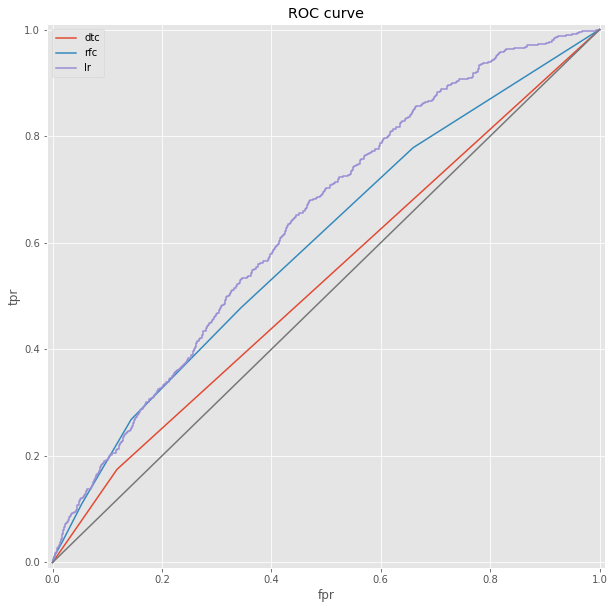

In [1331]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
## Your Code Here

fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_train_test, predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_train_test, predict_proba_rfc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train_test, predict_proba_lr[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr_dtc, tpr_dtc, label='dtc')
plt.plot(fpr_rfc, tpr_rfc, label='rfc')
plt.plot(fpr_lr, tpr_lr, label='lr')
plt.legend()
plt.plot([1.0, 0], [1.0, 0])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

roc_auc_score(y_train_test, predict_proba_dtc[:,1]), roc_auc_score(y_train_test, predict_proba_rfc[:,1]), roc_auc_score(y_train_test, predict_proba_lr[:,1])

In [1350]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
## Your Code Here
s1 = cross_val_score( dtc, X_train_test, y_train_test, scoring='roc_auc', cv=cv.get_n_splits()), cross_val_score( rfc, X_train_test, y_train_test, scoring='roc_auc', cv=cv.get_n_splits()), cross_val_score( lr, X_train_test, y_train_test, scoring='roc_auc', cv=cv.get_n_splits())

for train_ind, test_ind in cv.split(X, y):
    x_train_xval_ml = np.array(X)[train_ind,:]
    x_test_xval_ml = np.array(X)[test_ind,:]
    y_train_xval_ml = np.array(y)[train_ind]

s2 = cross_val_score( dtc, x_train_xval_ml, y_train_xval_ml, scoring='roc_auc', cv=cv.get_n_splits()), cross_val_score( rfc, x_train_xval_ml, y_train_xval_ml, scoring='roc_auc', cv=cv.get_n_splits()), cross_val_score( lr, x_train_xval_ml, y_train_xval_ml, scoring='roc_auc', cv=cv.get_n_splits())


s1,s2

((array([0.54744136, 0.50697406, 0.57263092, 0.56639651, 0.54335144,
         0.53105872, 0.51199275, 0.52607119, 0.52394015, 0.5127182 ]),
  array([0.48247601, 0.63714908, 0.57058247, 0.64926968, 0.6382704 ,
         0.56937202, 0.57007481, 0.51883927, 0.57950578, 0.59430968]),
  array([0.62624378, 0.72272566, 0.65252048, 0.60545066, 0.61978981,
         0.71924734, 0.65069145, 0.6594423 , 0.61514396, 0.65005668])),
 (array([0.53779275, 0.49266294, 0.52209504, 0.49325509, 0.52715499,
         0.54431715, 0.49240626, 0.51570339, 0.50427211, 0.52623754]),
  array([0.60257492, 0.55668112, 0.6058854 , 0.58641056, 0.62553052,
         0.5991227 , 0.60083816, 0.63526667, 0.60918161, 0.65899838]),
  array([0.65635925, 0.62982805, 0.68337561, 0.6669835 , 0.65805806,
         0.62837944, 0.64613883, 0.64904621, 0.64113225, 0.66717156])))

In [1340]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
## Your Code Here
predict_lr_XTEST_proba = lr.predict_proba(X_test)

0.6199107685627443

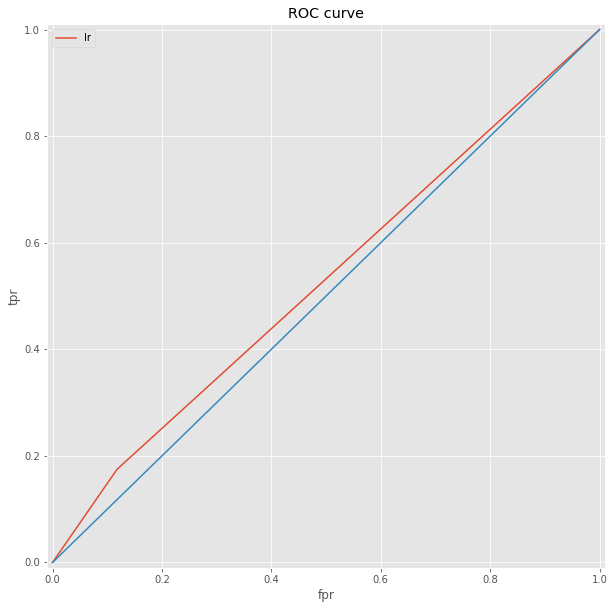

In [1342]:
# Померить roc_auc на тесте
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predict_lr_XTEST_proba[:, 1])
plt.figure(figsize=(10, 10))
plt.plot(fpr_dtc, tpr_dtc, label='lr')
plt.legend()
plt.plot([1.0, 0], [1.0, 0])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
roc_auc_score(y_test, predict_lr_XTEST_proba[:, 1])